Taken in part from the course [Creative applications of deep learning with tensorflow](https://www.kadenze.com/courses/creative-applications-of-deep-learning-with-tensorflow-i)

In [1]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

# Regression to a sine wave

### Creating the dataset

In [21]:
#---------------------------------------------
# Create the data set: Sine wave with noise
#--------------------------------------------
n_observations = 1000
xs             = np.linspace(-3, 3, n_observations)
ys             = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
#plt.scatter(xs, ys, alpha=0.15, marker='+')


### The training procedure: L1 minimization with batch stochadtic GD

In [38]:
# L1 cost function
def distance(p1, p2):
    return tf.abs(p1 - p2)

def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost      = tf.reduce_mean(distance(Y_pred, Y))  # cost ==> mean L1 distance for alls samples
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)


    # Plot the true data distribution
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        # Here we tell tensorflow that we want to initialize all
        # the variables in the graph so we can use them
        # This will set `W` and `b` to their initial random normal value.
        sess.run(tf.initialize_all_variables())

        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / float(n_iterations))
                print ' iteration: {:3} Cost: {} , W: {}, B: {}'.format(it_i,training_cost, 
                                                                        sess.run(W, feed_dict={X: xs, Y: ys}),
                                                                        sess.run(B, feed_dict={X: xs, Y: ys}))

    fig.show()
    plt.draw()
    



### Linear regression

 iteration:   0 Cost: 1.03035402298 , W: [-0.0248701], B: [ 0.96460003]
 iteration:  10 Cost: 0.694006204605 , W: [ 0.1942326], B: [ 0.61780024]
 iteration:  20 Cost: 0.493800997734 , W: [ 0.32691705], B: [ 0.33410037]
 iteration:  30 Cost: 0.43354088068 , W: [ 0.35499027], B: [ 0.16530034]
 iteration:  40 Cost: 0.41714733839 , W: [ 0.36407185], B: [ 0.07610039]
 iteration:  50 Cost: 0.413331866264 , W: [ 0.36857197], B: [ 0.03400039]
 iteration:  60 Cost: 0.41251128912 , W: [ 0.36684448], B: [ 0.01430039]
 iteration:  70 Cost: 0.412402927876 , W: [ 0.36543494], B: [ 0.0073004]
 iteration:  80 Cost: 0.412398070097 , W: [ 0.36553544], B: [ 0.00580039]
 iteration:  90 Cost: 0.412397712469 , W: [ 0.36503097], B: [ 0.0056004]


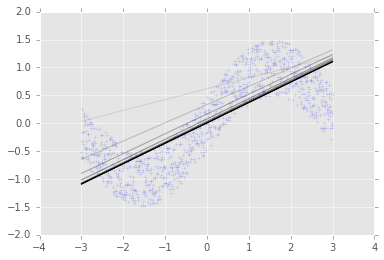

In [39]:
# Reset default graph
tf.reset_default_graph()

# Declare variables 
# placeholders to hold input data
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Variables for internal weights
W         = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')
B         = tf.Variable(tf.constant([1], dtype=tf.float32), name='bias')
Y_pred    = X * W + B

train(X,Y,Y_pred)

### Cubic polynomial regression

 iteration:   0 Cost: 0.676701307297 , W: [ 0.05522368], B: [ 1.]
 iteration:  10 Cost: 0.522268712521 , W: [ 0.02015316], B: [ 1.]
 iteration:  20 Cost: 0.381782948971 , W: [-0.01980134], B: [ 1.]
 iteration:  30 Cost: 0.317542016506 , W: [-0.06048736], B: [ 1.]
 iteration:  40 Cost: 0.305186659098 , W: [-0.05192461], B: [ 1.]
 iteration:  50 Cost: 0.303657889366 , W: [-0.06042466], B: [ 1.]
 iteration:  60 Cost: 0.283370107412 , W: [-0.0993569], B: [ 1.]
 iteration:  70 Cost: 0.259165644646 , W: [-0.09331605], B: [ 1.]
 iteration:  80 Cost: 0.309236466885 , W: [-0.11682495], B: [ 1.]
 iteration:  90 Cost: 0.285782068968 , W: [-0.11352347], B: [ 1.]


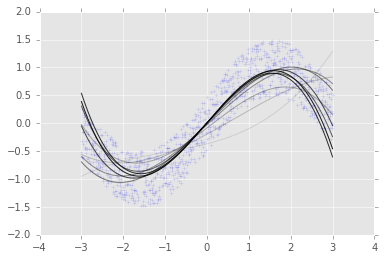

In [40]:
# Reset default graph
tf.reset_default_graph()

# Declare variables 
# placeholders to hold input data
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Variables for internal weights
B         = tf.Variable(tf.constant([1], dtype=tf.float32), name='bias')
Y_pred    = tf.Variable(tf.random_normal([1]), name='bias')

for pow_i in range(0, 4):
    # Instantiate weight for each monomial
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.mul(tf.pow(X, pow_i), W), Y_pred)


train(X,Y,Y_pred)

## Non linear activation

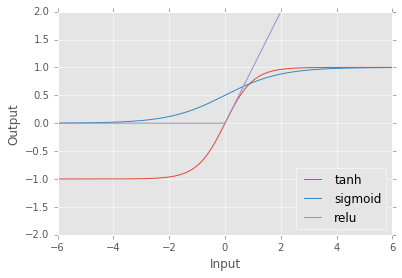

In [41]:
# Reset default graph
tf.reset_default_graph()

sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')